<a href="https://colab.research.google.com/github/heyrobin/Rossmann-Store-Sales-XGBoost-0.13-/blob/main/Rossmann_Store_Sales_with_XGBoost(Score_%3D_0_13245).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download The Dataset

In [9]:
import os
import pandas as pd


In [15]:
!pip install opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

In [19]:
os.listdir('rossmann-store-sales')

['store.csv', 'test.csv', 'sample_submission.csv', 'train.csv']

In [20]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('./rossmann-store-sales/store.csv')
test_df = pd.read_csv('./rossmann-store-sales/test.csv')
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [21]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
224064,1065,1,2015-01-12,6001,585,1,1.0,0,0.0
224065,1066,1,2015-01-12,12690,1232,1,1.0,0,0.0
224066,1067,1,2015-01-12,7535,562,1,1.0,0,0.0
224067,1068,1,2015-01-12,5561,381,1,1.0,0,0.0


In [22]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [23]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [24]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


Merging store to test and train data 

In [25]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [26]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224064,1065,1,2015-01-12,6001,585,1,1.0,0,0.0,a,a,1290.0,NaN,NaN,1,35.0,2011.0,"Mar,Jun,Sept,Dec"
224065,1066,1,2015-01-12,12690,1232,1,1.0,0,0.0,a,a,3350.0,NaN,NaN,0,NaN,NaN,NaN
224066,1067,1,2015-01-12,7535,562,1,1.0,0,0.0,d,c,12020.0,7.0,2009.0,0,NaN,NaN,NaN
224067,1068,1,2015-01-12,5561,381,1,1.0,0,0.0,d,c,5010.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct"


In [27]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# EDA

# Preprocessing and Feature Engineering

Date

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224069 entries, 0 to 224068
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      224069 non-null  int64  
 1   DayOfWeek                  224069 non-null  int64  
 2   Date                       224069 non-null  object 
 3   Sales                      224069 non-null  int64  
 4   Customers                  224069 non-null  int64  
 5   Open                       224069 non-null  int64  
 6   Promo                      224068 non-null  float64
 7   StateHoliday               224068 non-null  object 
 8   SchoolHoliday              224068 non-null  float64
 9   StoreType                  224069 non-null  object 
 10  Assortment                 224069 non-null  object 
 11  CompetitionDistance        223466 non-null  float64
 12  CompetitionOpenSinceMonth  152929 non-null  float64
 13  CompetitionOpenSinceYear   15

In [29]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [30]:
split_date(merged_df)
split_date(merged_test_df)

In [31]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224064,1065,1,2015-01-12,6001,585,1,1.0,0,0.0,a,a,1290.0,NaN,NaN,1,35.0,2011.0,"Mar,Jun,Sept,Dec",2015,1,12,3
224065,1066,1,2015-01-12,12690,1232,1,1.0,0,0.0,a,a,3350.0,NaN,NaN,0,NaN,NaN,NaN,2015,1,12,3
224066,1067,1,2015-01-12,7535,562,1,1.0,0,0.0,d,c,12020.0,7.0,2009.0,0,NaN,NaN,NaN,2015,1,12,3
224067,1068,1,2015-01-12,5561,381,1,1.0,0,0.0,d,c,5010.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct",2015,1,12,3


Store/open and closed

In [32]:
merged_df[merged_df.Open == 0].Sales.value_counts()

0    36754
Name: Sales, dtype: int64

In [33]:
merged_df = merged_df[merged_df.Open == 1].copy()

Competition

In [34]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [35]:
comp_months(merged_df)
comp_months(merged_test_df)

In [36]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224064,1065,1,2015-01-12,6001,585,1,1.0,0,0.0,a,a,1290.0,NaN,NaN,1,35.0,2011.0,"Mar,Jun,Sept,Dec",2015,1,12,3,0.0
224065,1066,1,2015-01-12,12690,1232,1,1.0,0,0.0,a,a,3350.0,NaN,NaN,0,NaN,NaN,NaN,2015,1,12,3,0.0
224066,1067,1,2015-01-12,7535,562,1,1.0,0,0.0,d,c,12020.0,7.0,2009.0,0,NaN,NaN,NaN,2015,1,12,3,66.0
224067,1068,1,2015-01-12,5561,381,1,1.0,0,0.0,d,c,5010.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct",2015,1,12,3,0.0


In [37]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
125950,2015-04-10,820.0,2012.0,3.0,37.0
90359,2015-05-11,9710.0,2014.0,2.0,15.0
165995,2015-03-05,4180.0,NaN,NaN,0.0
126751,2015-04-09,3450.0,NaN,NaN,0.0
97072,2015-05-05,250.0,NaN,NaN,0.0
69553,2015-05-30,1250.0,NaN,NaN,0.0
13041,2015-07-20,8250.0,2004.0,10.0,129.0
12715,2015-07-20,2460.0,2009.0,4.0,75.0
135736,2015-04-01,410.0,2010.0,11.0,53.0
28930,2015-07-06,5350.0,NaN,NaN,0.0


# Promo 2

In [38]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [39]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [40]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [41]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
119290,2015-04-16,0,NaN,NaN,NaN,0.000000,0
188064,2015-02-13,1,2009.0,37.0,"Jan,Apr,Jul,Oct",65.114754,0
11789,2015-07-21,0,NaN,NaN,NaN,0.000000,0
2706,2015-07-29,1,2010.0,35.0,"Jan,Apr,Jul,Oct",59.081967,1
164799,2015-03-06,0,NaN,NaN,NaN,0.000000,0
39663,2015-06-26,0,NaN,NaN,NaN,0.000000,0
18619,2015-07-15,0,NaN,NaN,NaN,0.000000,0
45766,2015-06-20,1,2010.0,39.0,"Jan,Apr,Jul,Oct",56.786885,0
136179,2015-03-31,0,NaN,NaN,NaN,0.000000,0
34068,2015-07-01,1,2009.0,45.0,"Feb,May,Aug,Nov",67.868852,0


# Input Train and Targets

In [42]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [43]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [44]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [45]:
targets

0          5263
1          6064
2          8314
3         13995
4          4822
          ...  
224064     6001
224065    12690
224066     7535
224067     5561
224068     8996
Name: Sales, Length: 187315, dtype: int64

In [46]:
test_inputs = merged_test_df[input_cols].copy()

In [47]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

# Impute missing numerical data

In [48]:
inputs[numeric_cols].isna().sum()

Store                    0
Promo                    1
SchoolHoliday            1
CompetitionDistance    503
CompetitionOpen          0
Promo2                   0
Promo2Open               0
IsPromo2Month            0
Day                      0
Month                    0
Year                     0
WeekOfYear               0
dtype: int64

In [49]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [50]:
max_distance = inputs.CompetitionDistance.max()

In [51]:
max_distance

75860.0

In [52]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

# Scale Numerical Values

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [55]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# Encode Categorical Columns

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [58]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Extract out all the numeric data for training.

In [59]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Model Selection Gradient Boosting

In [60]:
from xgboost import XGBRegressor

In [61]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [62]:
%%time
model.fit(X, targets)

CPU times: user 6.72 s, sys: 78.2 ms, total: 6.79 s
Wall time: 3.73 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Prediction

In [63]:
preds = model.predict(X)

In [64]:
preds

array([7947.7266, 7512.9917, 8745.85  , ..., 9176.998 , 7674.1016,
       9077.448 ], dtype=float32)

In [65]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [66]:
rmse(preds, targets)

2284.8449546829765

# Visualzation

In [67]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

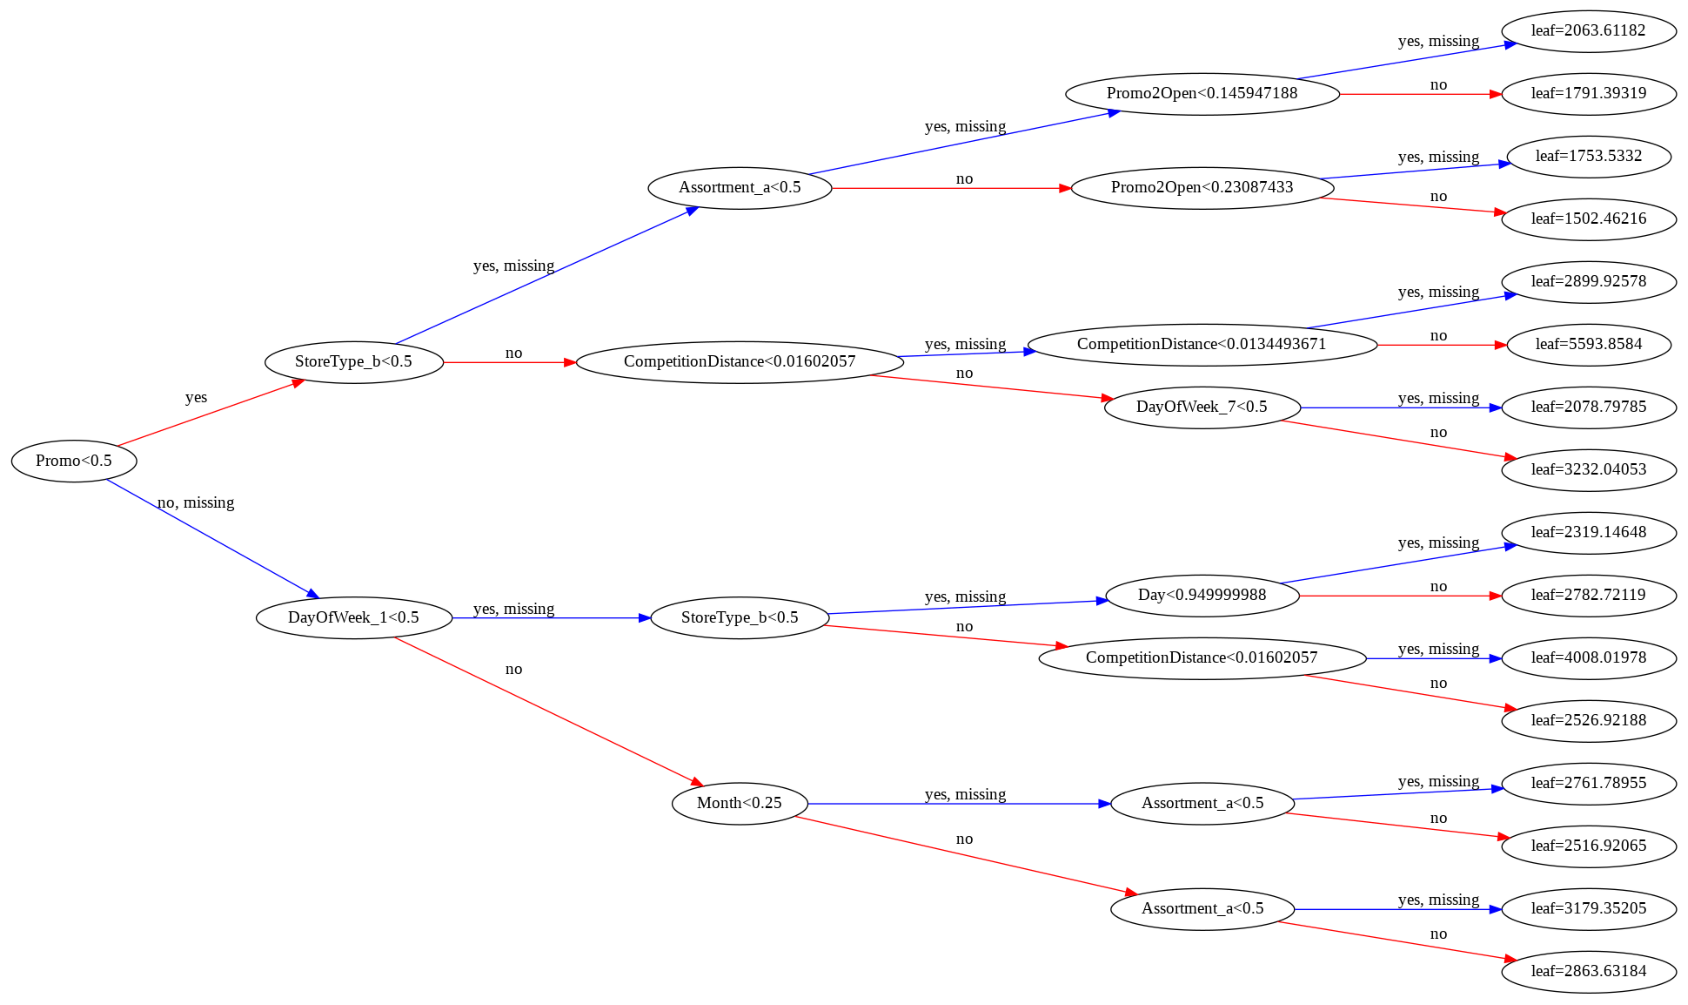

In [68]:
plot_tree(model, rankdir='LR');

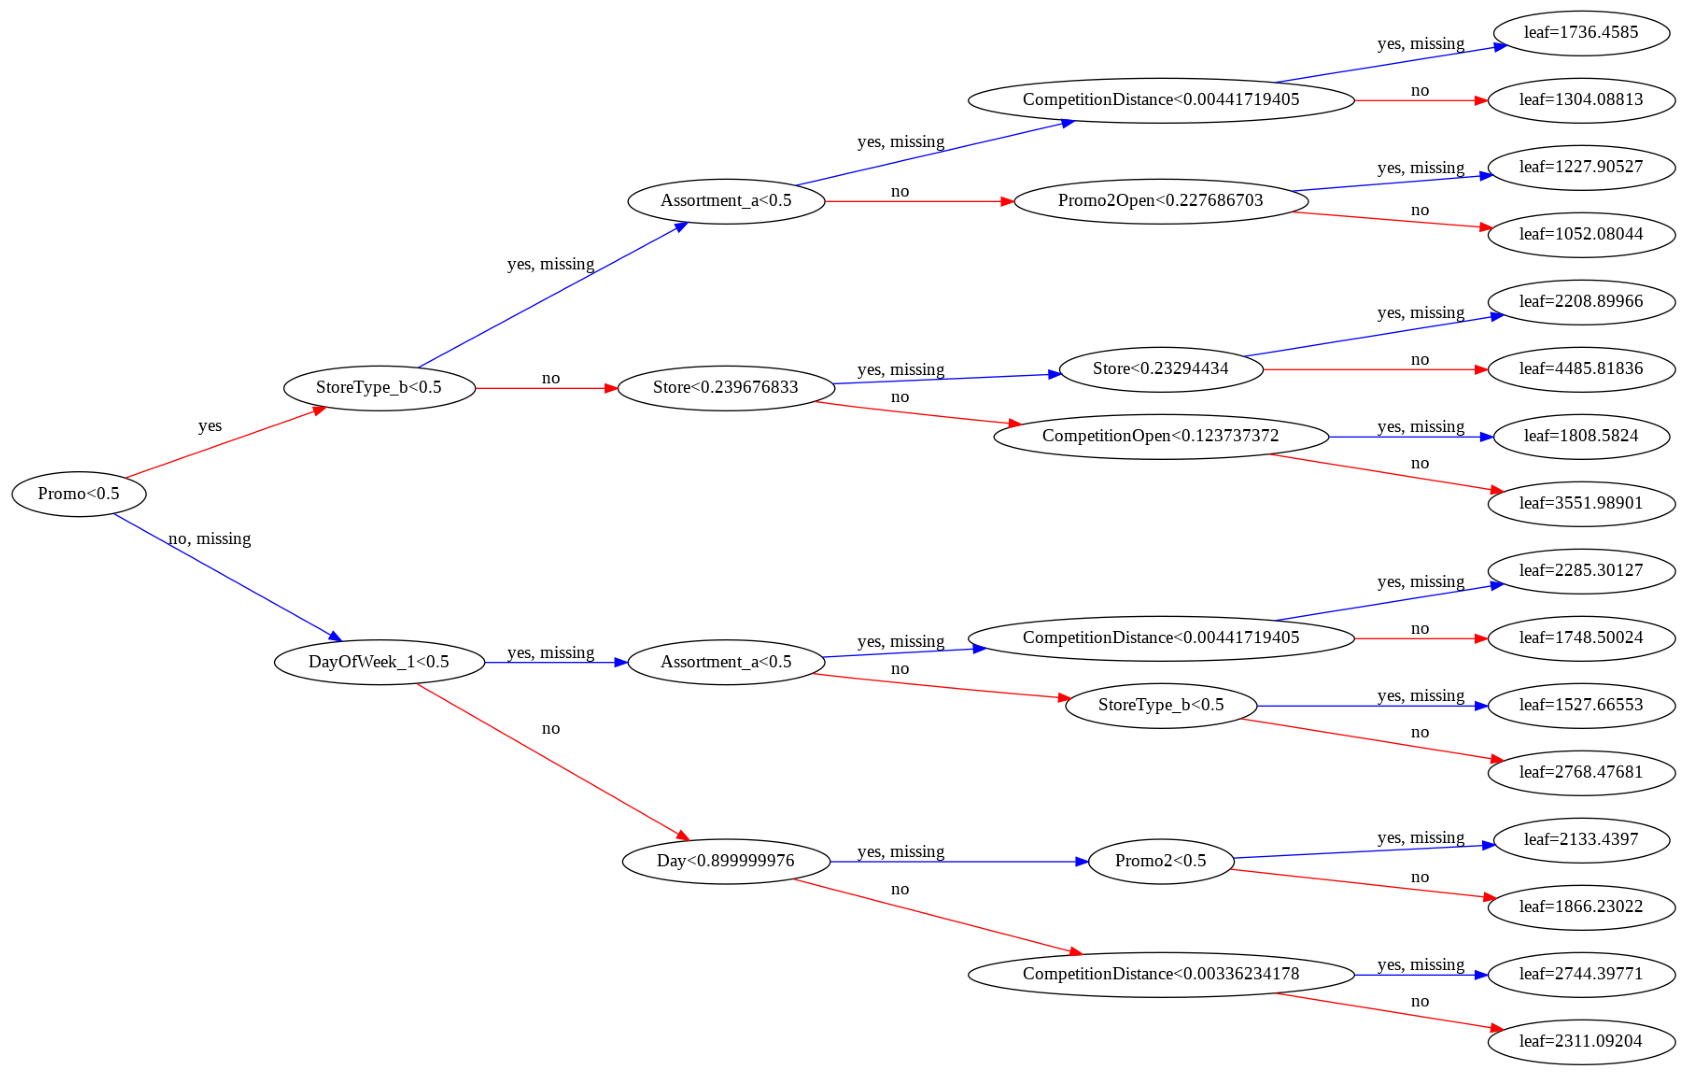

In [69]:
plot_tree(model, rankdir='LR', num_trees=1);

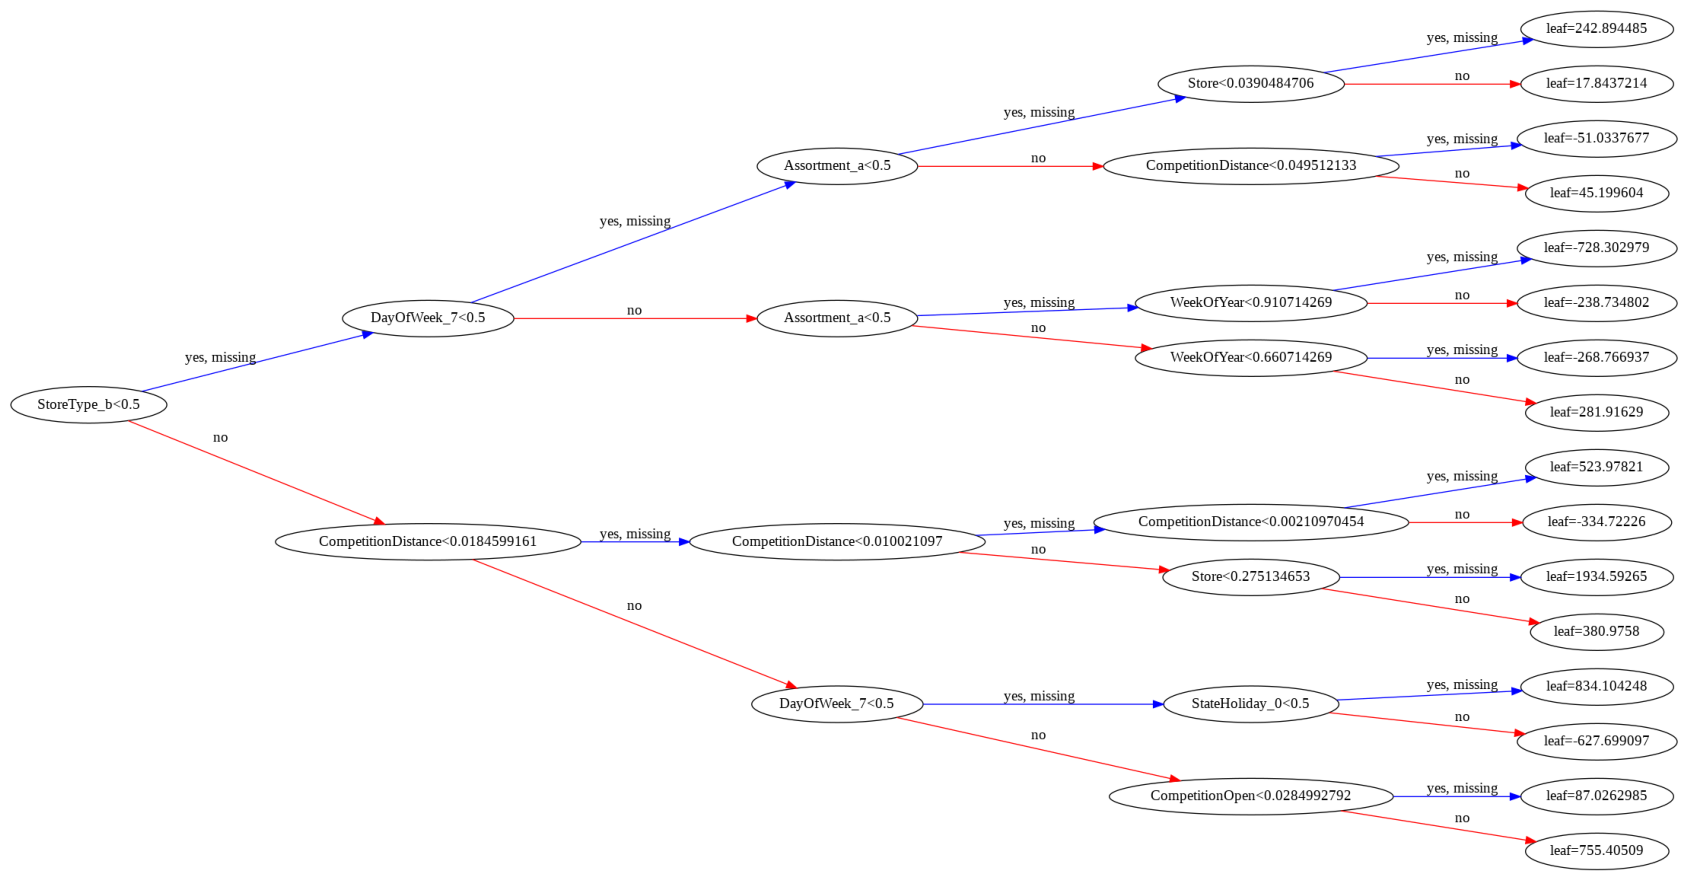

In [70]:
plot_tree(model, rankdir='LR', num_trees=19);

In [71]:
trees = model.get_booster().get_dump()

In [72]:
len(trees)

20

In [73]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=2
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[Promo2Open<0.145947188] yes=15,no=16,missing=15
				15:leaf=2063.61182
				16:leaf=1791.39319
			8:[Promo2Open<0.23087433] yes=17,no=18,missing=17
				17:leaf=1753.5332
				18:leaf=1502.46216
		4:[CompetitionDistance<0.01602057] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.0134493671] yes=19,no=20,missing=19
				19:leaf=2899.92578
				20:leaf=5593.8584
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=2078.79785
				22:leaf=3232.04053
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[StoreType_b<0.5] yes=11,no=12,missing=11
			11:[Day<0.949999988] yes=23,no=24,missing=23
				23:leaf=2319.14648
				24:leaf=2782.72119
			12:[CompetitionDistance<0.01602057] yes=25,no=26,missing=25
				25:leaf=4008.01978
				26:leaf=2526.92188
		6:[Month<0.25] yes=13,no=14,missing=13
			13:[Assortment_a<0.5] yes=27,no=28,missing=27
				27:leaf=2761.78955
				28:leaf=251

# Feature Importance

In [74]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [75]:
importance_df.head(10)


,feature,importance
1,Promo,0.300415
12,DayOfWeek_1,0.093002
24,StoreType_b,0.075600
5,Promo2,0.071164
27,Assortment_a,0.052772
8,Day,0.042837
0,Store,0.041579
6,Promo2Open,0.040735
3,CompetitionDistance,0.037203
26,StoreType_d,0.033783


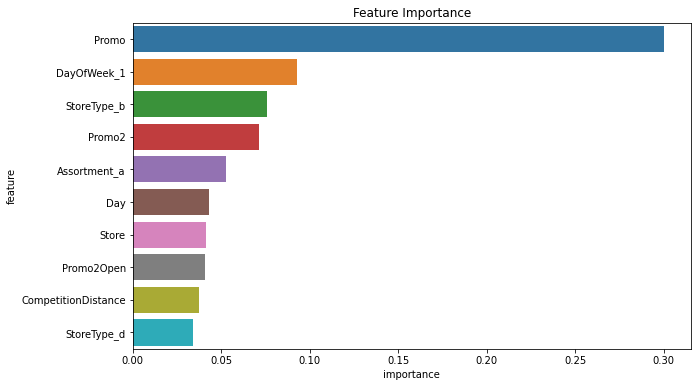

In [76]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# K Fold Cross Validation


In [77]:
from sklearn.model_selection import KFold

In [78]:
def train_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train,train_targets)
    train_rmse = rmse((model.predict(X_train)), train_targets)
    val_rmse = rmse((model.predict(X_val)), val_targets)
    return model, train_rmse, val_rmse

In [79]:
kfold = KFold(n_splits=5)

In [80]:
models = []

for train_idxs , val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_evaluate(X_train, train_targets, X_val, val_targets,max_depth=4,n_estimators=20)

    models.append(model)

    print('{} {}'.format(train_rmse,val_rmse))

2271.5271923891246 2376.487428448291
2271.195534107953 2411.5228740586867
2226.744463388371 2539.168556097122
2322.3956896735804 2246.824467250136
2286.848241413225 2253.737935927862


In [81]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [82]:
preds = predict_avg(models, X)

In [83]:
preds

array([8066.655, 7530.436, 8210.878, ..., 9322.507, 7911.633, 8033.823],
      dtype=float32)

# HyperParameter Tuning and Regularization

In [84]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [85]:
from sklearn.model_selection import train_test_split


In [86]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)


In [87]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

n_estimators

In [88]:
test_params(n_estimators=10)

Train RMSE: 2272.8092759953474, Validation RMSE: 2304.0473270693437


In [89]:
test_params(n_estimators=30)


Train RMSE: 1770.6143502297919, Validation RMSE: 1811.5113592381717


In [90]:
test_params(n_estimators=100)


Train RMSE: 1049.988224079201, Validation RMSE: 1092.9758407954255


In [ ]:
test_params(n_estimators=240)


max_depth

In [ ]:
test_params(max_depth = 2)

In [ ]:
test_params(max_depth = 5)

In [ ]:
test_params(max_depth = 10)

Learning Rate

In [ ]:
test_params(n_estimator =50 , learning_rate=0.01)

In [ ]:
test_params(n_estimator =50 , learning_rate=0.1)

In [ ]:
test_params(n_estimator =50 , learning_rate=0.3)

In [ ]:
test_params(n_estimator =50 , learning_rate=0.9)

In [ ]:
test_params(n_estimator =50 , learning_rate=0.99)

Booster

In [ ]:
test_params(booster='gblinear')

# Final Model

In [ ]:
model = XGBRegressor(n_jobs=-1, 
                     random_state=42, 
                     n_estimators=100, 
                     learning_rate=0.2,
                     max_depth=10,
                     subsample=0.9, 
                     colsample_bytree=0.7).fit(X,targets)

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
submission_df['Sales']  = test_preds

In [ ]:
test_df.Open.isna().sum()

In [ ]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [ ]:
submission_df


In [ ]:
submission_df.to_csv('submission.csv', index=None)


# GridSearchCV

In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb1 = XGBRegressor()

In [ ]:
parameters = {'learning_rate': [0.01, 0.1,0.3,0.9],
              'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
              'n_estimators': [5, 10, 50, 100, 250]}

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb1,
                        param_grid=parameters,
                        verbose=10,
                        n_jobs = -1,
                        cv = 2).fit(X,targets)

Fitting 2 folds for each of 160 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed: 2

In [ ]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8142063585748515
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 250}


Grid Search CV final Model

In [ ]:
model = XGBRegressor(learning_rate = 0.1, max_depth= 10, n_estimators= 250).fit(X,targets)

In [ ]:
test_preds = model.predict(X_test)

# RandomSearch CV

In [ ]:
rand_parameters = {'learning_rate': np.arange(0.01,0.99),
                    'max_depth': np.arange(1,20),
                      'n_estimators': np.arange(90,500)}

In [ ]:
xgb_rand = RandomizedSearchCV(estimator=xgb1,
                        param_distributions=rand_parameters,
                        verbose=10,
                        n_iter=10,
                        n_jobs = -1,
                        cv = 2).fit(X,targets)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:  1.3min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:  3.9min remaining:  7.2min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  6.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed:  6.2min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  7.1min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.1min finished


In [ ]:
print(xgb_rand.best_score_)
print(xgb_rand.best_params_)

0.6269035280941708
{'n_estimators': 234, 'max_depth': 19, 'learning_rate': 0.01}


In [ ]:
model = XGBRegressor(learning_rate = 0.1, max_depth= 19, n_estimators= 234).fit(X,targets)

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
test_params(learning_rate = 0.1, max_depth= 19, n_estimators= 234)

Train RMSE: 149.8383052947166, Validation RMSE: 804.4962176529864


# Submission

In [ ]:
submission_df['Sales']  = test_preds

In [ ]:
test_df.Open.isna().sum()

11

In [ ]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)
submission_df


,Id,Sales
0,1,4309.237793
1,2,7589.503418
2,3,8962.559570
3,4,6991.644531
4,5,6757.610840
...,...,...
41083,41084,3007.844482
41084,41085,5770.184570
41085,41086,6334.894043
41086,41087,19394.597656


In [ ]:
submission_df.to_csv('submission.csv', index=None)